# **Data Visualization**

## Objectives
* Read the cleaned data and visualize it in order to understand trends, correlations, and to understand which variables influence price.

## Inputs
* The file uses `CarPrice_cleaned.csv` located in `data\cleaned` folder.

## Outputs
* This notebook generates various plots and relies on `matplotlib`, `seaborn` and `plotly` to generate them

## Load the libraries and the data
In this section relevant data analysis libraries and the raw data will be loaded.

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
sns.set_style('whitegrid')

The data will be loaded as the variable `df`:

In [12]:
df = pd.read_csv("../data/cleaned/CarPrice_cleaned.csv")
print(df.shape)
df.head()

(205, 27)


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,brand
0,1,3,alfa-romero giulia,gas,std,2,convertible,rwd,front,88.6,...,injection,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,alfa-romero stelvio,gas,std,2,convertible,rwd,front,88.6,...,injection,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,alfa-romero Quadrifoglio,gas,std,2,hatchback,rwd,front,94.5,...,injection,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,audi 100 ls,gas,std,4,sedan,fwd,front,99.8,...,injection,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,audi 100ls,gas,std,4,sedan,4wd,front,99.4,...,injection,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


## Overview of the price data distribution
This section will provide a brief overview of the price distribution. Let's first look at the summary statistics for price:

In [13]:
df['price'].describe().round(1)

count      205.0
mean     13276.7
std       7988.9
min       5118.0
25%       7788.0
50%      10295.0
75%      16503.0
max      45400.0
Name: price, dtype: float64

This data will be easier to visualize when presented as a box plot and a swarm plot:

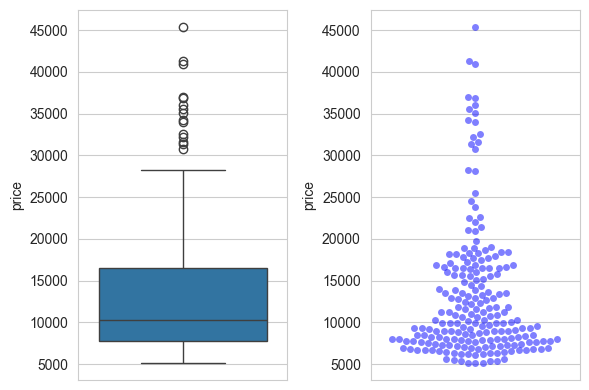

In [14]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(6, 4))
sns.boxplot(y='price', data=df, ax=ax[0])
sns.swarmplot(y='price', data=df, ax=ax[1], color='blue', alpha=0.5)
plt.tight_layout()
plt.show()

Here we can clearly see that the majority of car prices are concentrated at the lower end of the price range, with a significant number of outliers in the higher price range. These are likely more premium car models.

Next we will take a closer look at the price distribution with the kde plot overlayed over the histogram:

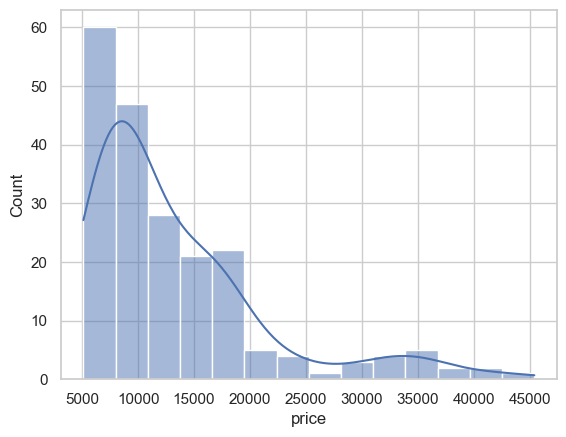

In [16]:
sns.histplot(data=df, x='price', kde=True)
plt.show()

Here we can see that the data shows a kind of mix between right skewed and bimodal data, with the second mode having clearly less objects. As expected most of the prices are concentrated in $5,000 - $20,000 range, with some significant outliers.

## Categorical variables and average price